In [55]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df_Ger = df[df['job_country'] == 'Germany']
df_Ger['job_posted_month'] = df['job_posted_date'].dt.month_name()
df_Ger

In [ ]:
df_Ger_pivot = df_Ger.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_Ger_pivot.reset_index(inplace=True)
df_Ger_pivot['month_nmb'] = pd.to_datetime(df_Ger_pivot['job_posted_month'], format='%B').dt.month
df_Ger_pivot

In [ ]:
df_Ger_pivot.sort_values('month_nmb', inplace=True)
df_Ger_pivot.set_index('job_posted_month')
df_Ger_pivot.drop(columns='month_nmb')

In [59]:
df_Ger_pivot_software = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

In [60]:
df_Ger_merged = df_Ger_pivot.merge(right=df_Ger_pivot_software, on='job_posted_month')

In [ ]:
top5 = (
    df_Ger_merged
    .sum(numeric_only=True)
    .sort_values(ascending=False)
    .head()
    .index
    .to_list()
)
top5

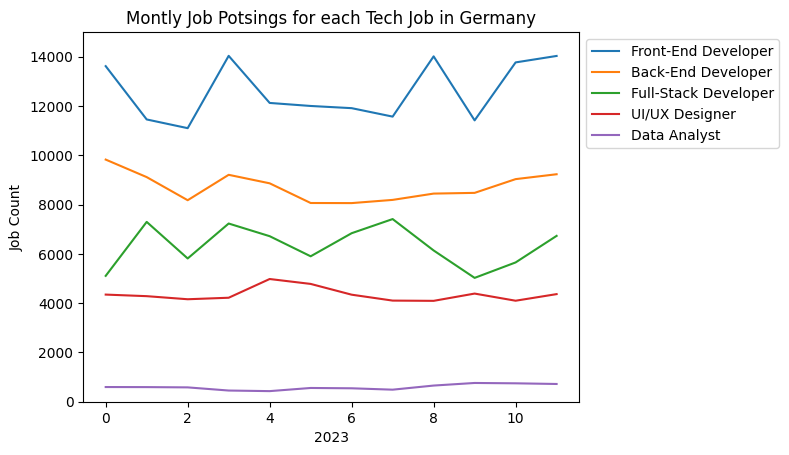

In [76]:
df_Ger_merged[top5].plot(kind='line')
plt.title('Montly Job Potsings for each Tech Job in Germany')
plt.xlabel('2023')#
plt.ylabel('Job Count')
plt.ylim(0,15000)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()